# Jamie's Phase 1 Project Work!
### hooray 

### also side note... highly recommend using command+F to navigate this sucker

## Here's the outline for this notebook:
1. 
2.
3.

In [2]:
# imports
import pandas as pd

### CPI package sourced from https://github.com/datadesk/cpi#:~:text=Working%20with%20Python,the%20Bureau%20of%20Labor%20Statistics

In [4]:
import cpi
cpi.update() # run to make sure current Consumer Price Index is being used in calculations

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [282]:
imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [283]:
rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [106]:
# kaggle_movies = pd.read_csv('movies_metadata.csv', dtype={'genres':list}) == not working

In [284]:
# get list of all columns in files
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

# Cleaning tnMovieBudgets

In [285]:
tnMovieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [286]:
# looking for more efficient way to do this
tnMovieBudgets['worldwide_gross'] = tnMovieBudgets['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['domestic_gross'] = tnMovieBudgets['domestic_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['production_budget'] = tnMovieBudgets['production_budget'].apply(lambda x: int(x.replace('$','').replace(',','')))
# tnMovieBudgets[tnMovieBudgets['worldwide_gross']=='$0'] = 'None'
# try applymap

# don't have to run again, but why??

In [287]:
# convert "release_date" to date-time format

tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [288]:
# adding 'month_released' and year released column
tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

tnMovieBudgets['year'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['year'] = tnMovieBudgets['year'].apply(lambda x: int(x[:4]))

#oopsie gotta drop some stuff
tnMovieBudgets.drop(labels='release_date', axis=1, inplace=True)

In [289]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year
0,1,Avatar,425000000,760507625,2776345279,12,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017


In [519]:
# creating new column 'total gross with adjusted values'
tnMovieBudgets['total_gross'] = tnMovieBudgets['worldwide_adj'] + tnMovieBudgets['domestic_adj']


# Cleaning bomMovieGross

In [290]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [291]:
bomMovieGross['foreign_gross'].fillna(value=0, inplace=True)

In [292]:
bomMovieGross['foreign_gross'] = bomMovieGross['foreign_gross'].apply(lambda x: float(str(x).replace(',','')))


# Adjusting all money values for inflation using CPI package


In [293]:
# bomMovieGross

bomMovieGross['domestic_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

bomMovieGross['foreign_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.foreign_gross, x.year), axis=1)

In [294]:
bomMovieGross.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

In [295]:
bomMovieGross.head()

,primary_title,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,Toy Story 3,BV,415000000.0,652000000.0,2010,4.925641e+08,7.738598e+08
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,3.966625e+08,8.205050e+08
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,3.513229e+08,7.884587e+08
3,Inception,WB,292600000.0,535700000.0,2010,3.472874e+08,6.358231e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2.833134e+08,6.099487e+08


In [296]:
bomMovieGross['year'].dtype

dtype('int64')

In [297]:
# found that no CPI exists after 2018
cpi.get(2018)

251.107

In [298]:
# tnMovieBudgets
tnMovieYA = tnMovieBudgets[tnMovieBudgets['year']<2019]

tnMovieBudgets['domestic_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

tnMovieBudgets['worldwide_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.worldwide_gross, x.year), axis=1)

tnMovieBudgets['budget_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.production_budget, x.year), axis=1)


In [299]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj,budget_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,9.174536e+08,3.349300e+09,5.127072e+08
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.773640e+08,1.203123e+09,4.724294e+08
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,NaN,NaN,NaN
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,5.012120e+08,1.532023e+09,3.609991e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.548212e+08,1.390266e+09,3.347058e+08


In [300]:
# Fill domestic/worldwide adjusted NaNs with original price-- the CPI adjuster does not adjust
# for any years after 2018.

tnMovieBudgets['domestic_adj'].fillna(value=tnMovieBudgets['domestic_gross'], inplace=True)


In [301]:
tnMovieBudgets['worldwide_adj'].fillna(value=tnMovieBudgets['worldwide_gross'], inplace=True)

In [302]:
tnMovieBudgets['budget_adj'].fillna(value=tnMovieBudgets['production_budget'], inplace=True)

# Cleaning tmdbMovies

In [303]:
tmdbMovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [304]:
tmdbMovies.drop('Unnamed: 0', axis=1, inplace=True)
# don't run again

In [305]:
tmdbMovies.drop('original_title', axis=1, inplace=True)

In [306]:
tmdbMovies.drop('original_language', axis=1, inplace=True)

In [308]:
tmdbMovies.columns

Index(['genre_ids', 'id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [309]:
# rename title column to match imdb data
tmdbMovies.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

# Cleaning IMDB Data

In [310]:
imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,

(           nconst         primary_name  birth_year  death_year  \
 0       nm0061671    Mary Ellen Bauder         NaN         NaN   
 1       nm0061865         Joseph Bauer         NaN         NaN   
 2       nm0062070           Bruce Baum         NaN         NaN   
 3       nm0062195         Axel Baumann         NaN         NaN   
 4       nm0062798          Pete Baxter         NaN         NaN   
 ...           ...                  ...         ...         ...   
 606643  nm9990381         Susan Grobes         NaN         NaN   
 606644  nm9990690          Joo Yeon So         NaN         NaN   
 606645  nm9991320       Madeline Smith         NaN         NaN   
 606646  nm9991786  Michelle Modigliani         NaN         NaN   
 606647  nm9993380       Pegasus Envoyé         NaN         NaN   
 
                                       primary_profession  \
 0              miscellaneous,production_manager,producer   
 1             composer,music_department,sound_department   
 2         

In [311]:
imdbNameBasics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [312]:
imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [313]:
imdbTitleBasics['primary_title'].value_counts()

Home                               24
Broken                             20
The Return                         20
Alone                              16
Homecoming                         16
                                   ..
Girl's Play                         1
MAMIL: Middle Aged Men in Lycra     1
Das Hotelzimmer                     1
Fear Valley                         1
Dow South Player University         1
Name: primary_title, Length: 136071, dtype: int64

In [314]:
# may use to create list of all possible titles when joining certain dataframes...
imdbTitleBasics['title_equal'] = (imdbTitleBasics['original_title'] == imdbTitleBasics['primary_title'])

imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,True
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",True
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False


In [315]:
imdbTitleBasics['title_equal'].value_counts()

True     131640
False     14504
Name: title_equal, dtype: int64

In [316]:
imdbTitleAkas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [317]:
# rename title_id to tconst to allow for appending
imdbTitleAkas.rename(mapper={'title_id' : 'tconst'}, axis=1, inplace=True)

#already ran

In [318]:
imdbTitleAkas.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [319]:
imdbTitleAkas['region'].value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
WF         1
SB         1
XNA        1
NC         1
MQ         1
Name: region, Length: 213, dtype: int64

In [320]:
imdbTitleCrew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [321]:
imdbTitlePrincipals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [322]:
imdbTitleRatings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Time to smush these Data frames together along the **tconst** column:

In [323]:
imdb_dfs = [imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]

In [324]:
len(imdb_dfs)

5

In [325]:
# maybe clean this up later with a for loop?
imdb_master = pd.merge(
                    pd.merge(
                            pd.merge(
                                    pd.merge(
                                        imdb_dfs[0], imdb_dfs[1], on='tconst', how = 'outer'
                                        ), 
                                imdb_dfs[2], on='tconst', how = 'outer'
                                ), 
                        imdb_dfs[3], on='tconst', how = 'outer', suffixes=('_akas', '_princ')
                        ),
                  imdb_dfs[4], on='tconst', how = 'outer')

In [326]:
len(imdb_master)

2975785

In [327]:
# remove any movies with start year after 2021
imdb_master = imdb_master.loc[imdb_master['start_year'] <= 2021]

### Merging in tmdbMovies by 'primary_title'

In [328]:
imdb_master = pd.merge(imdb_master, tmdbMovies, on='primary_title', how = 'outer')

In [329]:
imdb_master.drop_duplicates(subset=['tconst'], inplace=True)
# already ran

In [330]:
imdb_master.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,job,characters,averagerating,numvotes,genre_ids,id,popularity,release_date,vote_average,vote_count
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",True,1.0,Sangharsh,IN,...,NaN,NaN,7.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
50,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",False,1.0,One Day Before the Rainy Season,XWW,...,NaN,NaN,7.2,43.0,NaN,NaN,NaN,NaN,NaN,NaN
78,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,True,10.0,La otra cara del viento,VE,...,NaN,NaN,6.9,4517.0,"[35, 18]",299782.0,9.8,2018-11-02,7.0,64.0
208,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",True,1.0,Subse Bada Sukh,IN,...,NaN,"[""Lalloo""]",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN
238,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",False,1.0,La Telenovela Errante,NaN,...,NaN,NaN,6.5,119.0,NaN,NaN,NaN,NaN,NaN,NaN


**Making IMDB_master with BOM GROSS**

In [331]:
imdb_BOM = pd.merge(imdb_master, bomMovieGross, on='primary_title', how='outer')
imdb_BOM.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",True,1.0,Sangharsh,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",False,1.0,One Day Before the Rainy Season,XWW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,True,10.0,La otra cara del viento,VE,...,9.8,2018-11-02,7.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",True,1.0,Subse Bada Sukh,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",False,1.0,La Telenovela Errante,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
len(imdb_master)

146102

In [333]:
len(imdb_BOM)

146885

In [334]:
imdb_BOM.fillna(value='Unknown', inplace=True)

In [335]:
imdb_BOM['domestic_adj'][imdb_BOM['domestic_adj']!='Unknown'].value_counts().values.sum()

4112

In [336]:
# contains the most values
imdb_BOM['foreign_adj'][imdb_BOM['foreign_adj']!='Unknown'].value_counts().values.sum()

4147

In [337]:
len(imdb_BOM[(imdb_BOM['foreign_adj']!='Unknown')&(imdb_BOM['genres']!='Unknown')])

3326

In [338]:
# Clean up genres column 
imdb_BOM['genres'] = imdb_BOM['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )

In [339]:
imdb_BOM['genres'].head()

0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres, dtype: object

In [340]:
# Merge Movie Budgets onto imdb_BOM
imdb_BOM_tn = pd.merge(imdb_BOM, tnMoviesAdj, on='primary_title')

In [341]:
imdb_BOM_tn.fillna(value='Unknown', inplace=True)

In [342]:
len(imdb_BOM_tn['primary_title'])

3896

In [343]:
imdb_BOM_tn.replace(
    to_replace=imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'],
    value=0.0,
    inplace=True
    )

In [344]:
imdb_BOM_tn['popularity'].apply(lambda x: float(x) if x !='Unknown' else x)

0         4.705
1       Unknown
2         6.576
3         6.576
4         8.919
         ...   
3891    Unknown
3892    Unknown
3893    Unknown
3894    Unknown
3895    Unknown
Name: popularity, Length: 3896, dtype: object

In [345]:
# for the future - finding a way to consolidate all the lengths 
# for different levels of the data frame

imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].describe(include='all')

count     2992.0
unique    1603.0
top          0.6
freq       289.0
Name: popularity, dtype: float64

In [346]:
imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].count()

2992

In [347]:
imdb_master_money['popularity'][imdb_master_money['popularity']!='Unknown'].count()

2992

In [348]:
# exploring range of popularity column
imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].min()

0.6

In [349]:
imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].max()

80.773

In [401]:
# Creating column 'total_BOM_gross' (total gross but with Box Office Mojo data instead of tnMovieBudgets)

imdb_BOM_tn['total_BOM_gross'] = imdb_BOM_tn['domestic_adj_y'][imdb_BOM_tn['domestic_adj_y']!='Unknown'] + imdb_BOM_tn['foreign_adj'][imdb_BOM_tn['foreign_adj']!='Unknown']

imdb_BOM_tn['total_BOM_gross'].fillna(value='Unknown', inplace=True)

imdb_BOM_tn['total_BOM_gross'][imdb_BOM_tn['total_BOM_gross']!='Unknown'].value_counts().sum()


1682

In [402]:
genres = []
for movie in imdb_BOM_tn['genres']:
    if type(movie)==list:
        for genre in movie:
            if genre not in genres:
                genres.append(genre)
                
genres

['Action',
 'Animation',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Mystery',
 'Drama',
 'Romance',
 'Documentary',
 'Crime',
 'Sci-Fi',
 'Family',
 'Thriller',
 'Horror',
 'Biography',
 'History',
 'News',
 'War',
 'Sport',
 'Music',
 'Musical',
 'Western',
 'Reality-TV']

In [403]:
# find the top 10 genres with BOM_tn
# make genre dictionary
genre_dict_2 = {}


In [404]:
#removed
genres.pop(-1)

'Reality-TV'

In [405]:
for genre in genres:
    genre_dict_2[genre] = imdb_BOM_tn.iloc[genre_contained(genre, imdb_BOM_tn)]

In [408]:
# top 15 genres by their frequency in the DataFrame (how many movies classified with this descriptor)
top_15_genres = {i:len(genre_dict_2[i]) for i in genres}
sorted_top_15_genres = sorted(top_15_genres.items(), key=lambda kv: kv[1], reverse=True)[:15]
sorted_top_15_genres

[('Drama', 1817),
 ('Comedy', 842),
 ('Action', 710),
 ('Thriller', 594),
 ('Documentary', 499),
 ('Adventure', 490),
 ('Horror', 415),
 ('Crime', 398),
 ('Romance', 372),
 ('Mystery', 249),
 ('Biography', 248),
 ('Sci-Fi', 229),
 ('Family', 204),
 ('Fantasy', 202),
 ('Animation', 148)]

In [409]:
# split above tuple list into lists
top_genre_ct_names = [name[0] for name in sorted_top_15_genres]
top_genre_cts = [name[1] for name in sorted_top_15_genres]

In [410]:
# measuring top genres by popularity column

top_genres_popularity = {i:genre_dict_2[i]['popularity'][genre_dict_2[i]['popularity']!='Unknown'].mean() for i in genres}
sorted_top_genres_popularity = sorted(top_genres_popularity.items(), key=lambda kv: kv[1], reverse=True)
sorted_top_genres_popularity

[('Adventure', 15.849670644391395),
 ('Sci-Fi', 14.345203124999998),
 ('Fantasy', 14.015947674418602),
 ('Action', 13.435757024793395),
 ('Animation', 13.135606299212599),
 ('Musical', 10.57488),
 ('Crime', 10.242686956521734),
 ('Comedy', 9.783019774011308),
 ('Mystery', 9.461259999999992),
 ('News', 9.405199999999999),
 ('Biography', 9.351870813397127),
 ('Family', 9.19519230769231),
 ('Western', 8.6081),
 ('Thriller', 8.605823170731703),
 ('History', 8.564258823529412),
 ('Music', 8.364701492537312),
 ('Romance', 8.276813504823155),
 ('Drama', 8.089868055555574),
 ('Horror', 7.978852691218126),
 ('Sport', 6.140416666666668),
 ('War', 5.647642857142857),
 ('Documentary', 5.6210893371757935)]

In [411]:
most_popular_names = [name[0] for name in sorted_top_genres_popularity][:15]
most_popular_avgs = [avg[1] for avg in sorted_top_genres_popularity][:15]

print(most_popular_names)
# note for later - you can use the df.str.contains() to search for series with certain strings

['Adventure', 'Sci-Fi', 'Fantasy', 'Action', 'Animation', 'Musical', 'Crime', 'Comedy', 'Mystery', 'News', 'Biography', 'Family', 'Western', 'Thriller', 'History']


### Grouping IMDB master

In [503]:
# By movie title
def get_perc(grp_obj): # saw this on stack overflow, don't understand it
    gr_size = grp_obj.size()
    return gr_size / gr_size.sum()

grouped_titles = imdb_master.groupby(by=['tconst', 'title']).mean()
grouped_titles.head()

,,start_year,runtime_minutes,ordering_akas,is_original_title,ordering_princ,averagerating,numvotes,id,popularity,vote_average,vote_count
tconst,title,,,,,,,,,,,
tt0063540,Sangharsh,2013.0,175.0,1.0,0.0,10.0,7.0,77.0,NaN,NaN,NaN,NaN
tt0066787,One Day Before the Rainy Season,2019.0,114.0,1.0,0.0,1.0,7.2,43.0,NaN,NaN,NaN,NaN
tt0069049,La otra cara del viento,2018.0,122.0,10.0,0.0,10.0,6.9,4517.0,299782.0,9.8,7.0,64.0
tt0069204,Subse Bada Sukh,2018.0,NaN,1.0,0.0,10.0,6.1,13.0,NaN,NaN,NaN,NaN
tt0100275,La Telenovela Errante,2017.0,80.0,1.0,1.0,10.0,6.5,119.0,NaN,NaN,NaN,NaN


In [508]:
imdb_master['start_year'].value_counts()

2017.0    17504
2016.0    17272
2018.0    16849
2015.0    16243
2014.0    15589
2013.0    14709
2012.0    13787
2011.0    12900
2010.0    11849
2019.0     8379
2020.0      937
2021.0       83
Name: start_year, dtype: int64

## Creating imdb_master_money (with tnMovieBudgets)

In [360]:
tnMovieBudgets.columns

Index(['id', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'month_released', 'year', 'domestic_adj', 'worldwide_adj',
       'budget_adj'],
      dtype='object')

In [361]:
tnMovieBudgets.rename(mapper={'movie' : 'primary_title'}, axis=1, inplace=True)

In [534]:
tnMoviesAdj = tnMovieBudgets[['primary_title', 'month_released', 'year', 'domestic_adj', 'worldwide_adj', 'budget_adj', 'total_gross']]

In [535]:
imdb_master_money = pd.merge(imdb_master, tnMoviesAdj, on='primary_title')

In [536]:
# checking for NaNs
imdb_master_money['worldwide_adj'].isna().value_counts()

False    3816
Name: worldwide_adj, dtype: int64

In [537]:
# fill NaN values with 'Unknown'
imdb_master_money.fillna(value='Unknown', inplace=True)

In [538]:
imdb_master_money[(imdb_master_money['budget_adj']!='Unknown')&(imdb_master_money['genres']!='Unknown')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",True,10,Foodfight!,FI,...,4.705,2013-05-07,2.1,46,12,2012,0.000000e+00,8.308546e+04,5.072648e+07,8.308546e+04
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Unknown,"Action,Adventure,Fantasy",True,1,Mortal Kombat,Unknown,...,Unknown,Unknown,Unknown,Unknown,8,1995,1.196122e+08,2.074109e+08,3.396470e+07,3.270231e+08
3,tt3844362,The Overnight,The Overnight,2015,79,"Comedy,Mystery",True,10,Éjjeli találkozó,HU,...,6.576,2015-06-19,6,200,6,2015,1.211856e+06,1.273211e+06,2.183902e+05,2.485067e+06
4,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",True,10,En el camino,AR,...,8.919,2012-12-21,5.6,518,3,2013,8.008268e+05,1.034691e+07,2.777455e+07,1.114774e+07
5,tt2404548,On the Road,On the Road,2011,90,Drama,True,1,On the Road,AM,...,8.919,2012-12-21,5.6,518,3,2013,8.008268e+05,1.034691e+07,2.777455e+07,1.114774e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Unknown,"Documentary,Sport",True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,11,2008,2.094681e+05,2.094681e+05,3.005195e+06,4.189362e+05
3811,tt9729206,Diner,Diner,2019,Unknown,Crime,True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,4,1982,3.377392e+07,3.377392e+07,1.340990e+07,6.754783e+07
3812,tt9805168,Traitor,Traitor,2015,110,"Action,Drama,Romance",True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,8,2008,2.828589e+07,3.351661e+07,2.644572e+07,6.180250e+07
3813,tt9844102,Ray,Ray,2018,111,Crime,True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,10,2004,1.031764e+08,1.710195e+08,5.480381e+07,2.741959e+08


### Let's talk about genre ( grouping movies by genre )

In [539]:
# need to convert genres to list
imdb_master_money['genres'][4]

'Adventure,Drama,Romance'

In [540]:
imdb_master_money['genres'] = imdb_master_money['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )


In [541]:
imdb_master_money['genres']

0        [Action, Animation, Comedy]
1       [Action, Adventure, Fantasy]
2                            Unknown
3                  [Comedy, Mystery]
4        [Adventure, Drama, Romance]
                    ...             
3811                         [Crime]
3812        [Action, Drama, Romance]
3813                         [Crime]
3814                   [Documentary]
3815                         Unknown
Name: genres, Length: 3816, dtype: object

In [542]:
# let's find all the different genres
genres = []
for movie in imdb_master_money['genres']:
    if type(movie)==list:
        for genre in movie:
            if genre not in genres:
                genres.append(genre)
                
genres

['Action',
 'Animation',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Mystery',
 'Drama',
 'Romance',
 'Documentary',
 'Crime',
 'Sci-Fi',
 'Family',
 'Thriller',
 'Horror',
 'Biography',
 'History',
 'News',
 'War',
 'Sport',
 'Music',
 'Musical',
 'Western',
 'Reality-TV']

In [543]:
len(genres)

23

In [544]:
# create a dictionary pairing each genre with the DataFrame of movies that are classified as that genre

genre_dict = {}

# a function to determine whether or not a movie's genre column contains a given genre-- add docstring later
def genre_contained(genre, df):
    index_list = []
    truth_teller = 'None'
    ctr = 0
    for row in df['genres']:
        if type(row) == list:
            for i in row:
                #print(row)
                if i == genre:
                    truth_teller = True
                    index_list.append(ctr) # should i add continue here
                    #print(truth_teller)
                else:
                    truth_teller = False
                    #print(truth_teller)
        ctr += 1
    return index_list
                  
# genre_contained(genres[0], imdb_master_money) --> a test

In [545]:
for genre in genres:
    genre_dict[genre] = imdb_master_money.iloc[genre_contained(genre, imdb_master_money)]

In [517]:
# Determine which year data to use
imdb_master_money[imdb_master_money['start_year']!=imdb_master_money['year']].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,id,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Unknown,"[Action, Adventure, Fantasy]",True,1,Mortal Kombat,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,8,1995,1.196122e+08,2.074109e+08,3.396470e+07
2,tt0326592,The Overnight,The Overnight,2010,88,Unknown,True,1,"A Bellman, a Hooker, and a Rabbi...",US,...,308024,6.576,2015-06-19,6,200,6,2015,1.211856e+06,1.273211e+06,2.183902e+05
4,tt0337692,On the Road,On the Road,2012,124,"[Adventure, Drama, Romance]",True,10,En el camino,AR,...,83770,8.919,2012-12-21,5.6,518,3,2013,8.008268e+05,1.034691e+07,2.777455e+07
5,tt2404548,On the Road,On the Road,2011,90,[Drama],True,1,On the Road,AM,...,83770,8.919,2012-12-21,5.6,518,3,2013,8.008268e+05,1.034691e+07,2.777455e+07
7,tt4339118,On the Road,On the Road,2014,89,[Drama],True,1,Wo zai lu shang zui ai ni,CN,...,83770,8.919,2012-12-21,5.6,518,3,2013,8.008268e+05,1.034691e+07,2.777455e+07


In [499]:
imdb_master_money['year'][imdb_master_money['year']<2000].value_counts().sum() / imdb_master_money['year'].value_counts().sum()



0.12762054507337525

# Graphs

In [ ]:
# SOME HELPFUL FUNCS:

In [602]:
dicty = {'1':'a', '2':'b', '3':'c'}
dicty = list(dicty.keys())

'1'

In [692]:
# for determining if prime number - returns original or modified number
def un_prime(amount):
    if amount > 7:
        for i in range(2,amount):
            if (amount % i) == 0:
                return amount
            else:
                amount = amount+1
                if (amount % i) == 0:
                    return amount
    else:    
        print("Error: amount must be larger than 7")

In [698]:
un_prime(11)

In [687]:
# for calculation differences between factors
def diff_calc(amount):
    factor2 = []
    factor1 = []
    factor_diffs = []
    for i in range(1, amount + 1):
        if amount % i == 0:
            factor1.append(i)
            factor2.append(amount // i)

    for i in range(0, len(factor1)):
        factor_diffs.append(abs(factor2[i] - factor1[i]))

    return {'min_diff': min(factor_diffs), 'amount': amount, 'factor1': factor1, 'factor2':factor2, 'factor_diffs':factor_diffs, 'under_5': (min(factor_diffs) < 5)}



In [707]:
diff_calc(un_prime(22))

{'min_diff': 9,
 'amount': 22,
 'factor1': [1, 2, 11, 22],
 'factor2': [22, 11, 2, 1],
 'factor_diffs': [21, 9, 9, 21],
 'under_5': False}

In [708]:
# for keeping min difference under 5 - changes amount until min-differences < 5
def diff_under_5(info_dict):
    while info_dict['under_5'] == False:
        print("we're starting with", info_dict['amount'])
        print('another iteration')
        info_dict['amount'] = info_dict['amount'] + 1
        print(info_dict['amount'])
        info_dict = diff_calc(info_dict['amount'])
    return info_dict
            
            
            

In [742]:
test_dict = diff_under_5(diff_calc(un_prime(23)))
test_dict

{'min_diff': 2,
 'amount': 24,
 'factor1': [1, 2, 3, 4, 6, 8, 12, 24],
 'factor2': [24, 12, 8, 6, 4, 3, 2, 1],
 'factor_diffs': [23, 10, 5, 2, 2, 5, 10, 23],
 'under_5': True}

In [743]:
# for determining the shape of subplot matrix: returns shape as [rows, cols]
def nRowCol(info_dict):
    shape = []
    
    for i in range(0, len(info_dict['factor_diffs'])):
        if info_dict['factor_diffs'][i] == info_dict['min_diff']:
            if info_dict['factor1'][i] >= info_dict['factor2'][i]:
                if (info_dict['factor1'][i] / info_dict['factor2'][i]) > 5:
                    info_dict['row'] = info_dict['factor2'][i]
                    info_dict['column'] = info_dict['factor1'][i]
                    return [info_dict['row'], info_dict['column']]
                else:
                    info_dict['row'] = info_dict['factor1'][i]
                    info_dict['column'] = info_dict['factor2'][i]
                    return [info_dict['row'], info_dict['column']]
            else:
                if (info_dict['factor1'][i] / info_dict['factor2'][i]) > 5:
                    info_dict['row'] = info_dict['factor2'][i]
                    info_dict['column'] = info_dict['factor1'][i]
                    return [info_dict['row'], info_dict['column']]
                else:
                    info_dict['row'] = info_dict['factor1'][i]
                    info_dict['column'] = info_dict['factor2'][i]
                    return [info_dict['row'], info_dict['column']]

**Graphing most popular genres**

<ipython-input-166-47a97df911ec>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_genre_ct_names, rotation = 45)
<ipython-input-166-47a97df911ec>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(most_popular_names, rotation = 45)


Text(0.5, 1.0, 'Most Popular Genres by IMDB Popularity Rating')

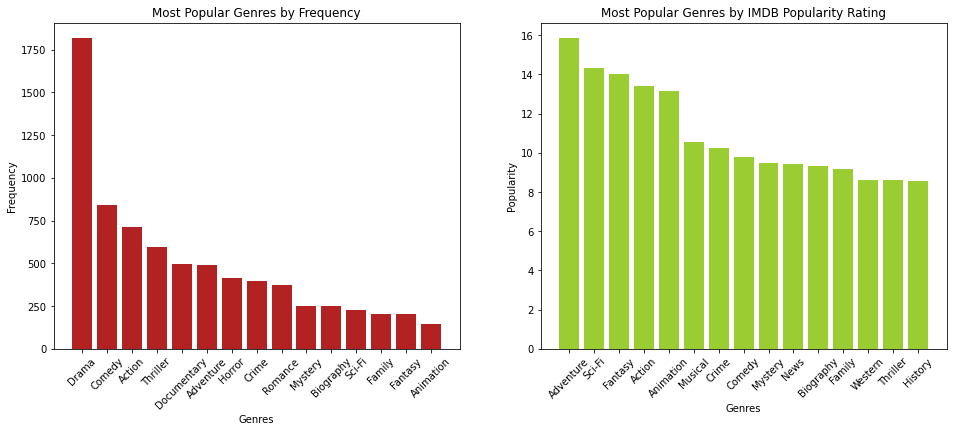

In [166]:
popular_genres1, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
###############

ax1.bar(top_genre_ct_names, top_genre_cts, color='firebrick')
ax2.bar(most_popular_names, most_popular_avgs, color='yellowgreen')
# x and y vals; use bottom parameter to make stacked
ax2.set_xlabel('Genres')
ax2.set_ylabel('Popularity')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Frequency')

ax1.set_xticklabels(top_genre_ct_names, rotation = 45)
ax2.set_xticklabels(most_popular_names, rotation = 45)

ax1.set_title('Most Popular Genres by Frequency')
ax2.set_title('Most Popular Genres by IMDB Popularity Rating')


In [764]:
figgy = nRowCol(test_dict)
figgy

[4, 6]

MONTH NAMES:

In [420]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']

GRAPHING 23 SUBPLOTS for EACH GENRE

Text(0.5, 1.0, 'Total Gross per Month per Genre')

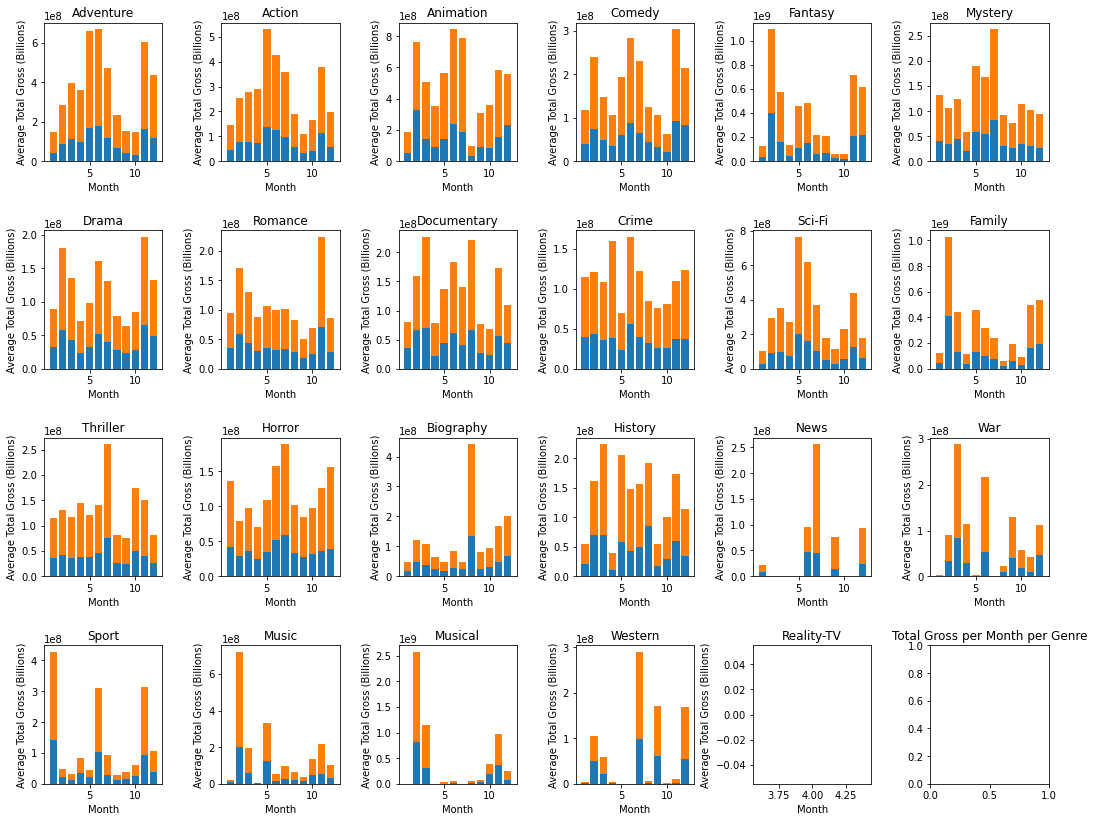

In [763]:
fig, ax = plt.subplots(nrows=figgy[0], ncols=figgy[1], figsize=(18,14))
###############
mean_dom_grosses = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][0].bar(months, mean_dom_grosses)   
ad2 = ax[0][0].bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax[0][0].set_title('Adventure')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Average Total Gross (Billions)')
###############


mean_dom_grosses1 = [genre_dict['Action'][genre_dict['Action']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses1 = [genre_dict['Action'][genre_dict['Action']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][1].bar(months, mean_dom_grosses1)   
ad2 = ax[0][1].bar(months, mean_ww_grosses1, bottom=mean_dom_grosses1) # use bottom parameter to make stacked
ax[0][1].set_title('Action')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses2 = [genre_dict['Animation'][genre_dict['Animation']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses2 = [genre_dict['Animation'][genre_dict['Animation']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][2].bar(months, mean_dom_grosses2)   
ad2 = ax[0][2].bar(months, mean_ww_grosses2, bottom=mean_dom_grosses2) # use bottom parameter to make stacked
ax[0][2].set_title('Animation')
ax[0][2].set_xlabel('Month')
ax[0][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses3 = [genre_dict['Comedy'][genre_dict['Comedy']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses3 = [genre_dict['Comedy'][genre_dict['Comedy']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][3].bar(months, mean_dom_grosses3)   
ad2 = ax[0][3].bar(months, mean_ww_grosses3, bottom=mean_dom_grosses3) # use bottom parameter to make stacked
ax[0][3].set_title('Comedy')
ax[0][3].set_xlabel('Month')
ax[0][3].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses4 = [genre_dict['Fantasy'][genre_dict['Fantasy']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses4 = [genre_dict['Fantasy'][genre_dict['Fantasy']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][4].bar(months, mean_dom_grosses4)   
ad2 = ax[0][4].bar(months, mean_ww_grosses4, bottom=mean_dom_grosses4) # use bottom parameter to make stacked
ax[0][4].set_title('Fantasy')
ax[0][4].set_xlabel('Month')
ax[0][4].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses5 = [genre_dict['Mystery'][genre_dict['Mystery']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses5 = [genre_dict['Mystery'][genre_dict['Mystery']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][5].bar(months, mean_dom_grosses5)   
ad2 = ax[0][5].bar(months, mean_ww_grosses5, bottom=mean_dom_grosses5) # use bottom parameter to make stacked
ax[0][5].set_title('Mystery')
ax[0][5].set_xlabel('Month')
ax[0][5].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses6 = [genre_dict['Drama'][genre_dict['Drama']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses6 = [genre_dict['Drama'][genre_dict['Drama']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][0].bar(months, mean_dom_grosses6)   
ad2 = ax[1][0].bar(months, mean_ww_grosses6, bottom=mean_dom_grosses6) # use bottom parameter to make stacked
ax[1][0].set_title('Drama')
ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses7 = [genre_dict['Romance'][genre_dict['Romance']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses7 = [genre_dict['Romance'][genre_dict['Romance']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][1].bar(months, mean_dom_grosses7)   
ad2 = ax[1][1].bar(months, mean_ww_grosses7, bottom=mean_dom_grosses7) # use bottom parameter to make stacked
ax[1][1].set_title('Romance')
ax[1][1].set_xlabel('Month')
ax[1][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses8 = [genre_dict['Documentary'][genre_dict['Documentary']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses8 = [genre_dict['Documentary'][genre_dict['Documentary']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][2].bar(months, mean_dom_grosses8)   
ad2 = ax[1][2].bar(months, mean_ww_grosses8, bottom=mean_dom_grosses8) # use bottom parameter to make stacked
ax[1][2].set_title('Documentary')
ax[1][2].set_xlabel('Month')
ax[1][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses9 = [genre_dict['Crime'][genre_dict['Crime']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses9 = [genre_dict['Crime'][genre_dict['Crime']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][3].bar(months, mean_dom_grosses9)   
ad2 = ax[1][3].bar(months, mean_ww_grosses9, bottom=mean_dom_grosses9) # use bottom parameter to make stacked
ax[1][3].set_title('Crime')
ax[1][3].set_xlabel('Month')
ax[1][3].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses10 = [genre_dict['Sci-Fi'][genre_dict['Sci-Fi']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses10 = [genre_dict['Sci-Fi'][genre_dict['Sci-Fi']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][4].bar(months, mean_dom_grosses10)   
ad2 = ax[1][4].bar(months, mean_ww_grosses10, bottom=mean_dom_grosses10) # use bottom parameter to make stacked
ax[1][4].set_title('Sci-Fi')
ax[1][4].set_xlabel('Month')
ax[1][4].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses11 = [genre_dict['Family'][genre_dict['Family']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses11 = [genre_dict['Family'][genre_dict['Family']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][5].bar(months, mean_dom_grosses11)   
ad2 = ax[1][5].bar(months, mean_ww_grosses11, bottom=mean_dom_grosses11) # use bottom parameter to make stacked
ax[1][5].set_title('Family')
ax[1][5].set_xlabel('Month')
ax[1][5].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses12 = [genre_dict['Thriller'][genre_dict['Thriller']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses12 = [genre_dict['Thriller'][genre_dict['Thriller']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][0].bar(months, mean_dom_grosses12)   
ad2 = ax[2][0].bar(months, mean_ww_grosses12, bottom=mean_dom_grosses12) # use bottom parameter to make stacked
ax[2][0].set_title('Thriller')
ax[2][0].set_xlabel('Month')
ax[2][0].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses13 = [genre_dict['Horror'][genre_dict['Horror']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses13 = [genre_dict['Horror'][genre_dict['Horror']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][1].bar(months, mean_dom_grosses13)   
ad2 = ax[2][1].bar(months, mean_ww_grosses13, bottom=mean_dom_grosses13) # use bottom parameter to make stacked
ax[2][1].set_title('Horror')
ax[2][1].set_xlabel('Month')
ax[2][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses14 = [genre_dict['Biography'][genre_dict['Biography']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses14 = [genre_dict['Biography'][genre_dict['Biography']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][2].bar(months, mean_dom_grosses14)   
ad2 = ax[2][2].bar(months, mean_ww_grosses14, bottom=mean_dom_grosses14) # use bottom parameter to make stacked
ax[2][2].set_title('Biography')
ax[2][2].set_xlabel('Month')
ax[2][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses15 = [genre_dict['History'][genre_dict['History']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses15 = [genre_dict['History'][genre_dict['History']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][3].bar(months, mean_dom_grosses15)   
ad2 = ax[2][3].bar(months, mean_ww_grosses15, bottom=mean_dom_grosses15) # use bottom parameter to make stacked
ax[2][3].set_title('History')
ax[2][3].set_xlabel('Month')
ax[2][3].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses16 = [genre_dict['News'][genre_dict['News']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses16 = [genre_dict['News'][genre_dict['News']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][4].bar(months, mean_dom_grosses16)   
ad2 = ax[2][4].bar(months, mean_ww_grosses16, bottom=mean_dom_grosses16) # use bottom parameter to make stacked
ax[2][4].set_title('News')
ax[2][4].set_xlabel('Month')
ax[2][4].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses17 = [genre_dict['War'][genre_dict['War']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses17 = [genre_dict['War'][genre_dict['War']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][5].bar(months, mean_dom_grosses17)   
ad2 = ax[2][5].bar(months, mean_ww_grosses17, bottom=mean_dom_grosses17) # use bottom parameter to make stacked
ax[2][5].set_title('War')
ax[2][5].set_xlabel('Month')
ax[2][5].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses18 = [genre_dict['Sport'][genre_dict['Sport']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses18 = [genre_dict['Sport'][genre_dict['Sport']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][0].bar(months, mean_dom_grosses18)   
ad2 = ax[3][0].bar(months, mean_ww_grosses18, bottom=mean_dom_grosses18) # use bottom parameter to make stacked
ax[3][0].set_title('Sport')
ax[3][0].set_xlabel('Month')
ax[3][0].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses19 = [genre_dict['Music'][genre_dict['Music']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses19 = [genre_dict['Music'][genre_dict['Music']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][1].bar(months, mean_dom_grosses19)   
ad2 = ax[3][1].bar(months, mean_ww_grosses19, bottom=mean_dom_grosses19) # use bottom parameter to make stacked
ax[3][1].set_title('Music')
ax[3][1].set_xlabel('Month')
ax[3][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses20 = [genre_dict['Musical'][genre_dict['Musical']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses20 = [genre_dict['Musical'][genre_dict['Musical']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][2].bar(months, mean_dom_grosses20)   
ad2 = ax[3][2].bar(months, mean_ww_grosses20, bottom=mean_dom_grosses20) # use bottom parameter to make stacked
ax[3][2].set_title('Musical')
ax[3][2].set_xlabel('Month')
ax[3][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses21 = [genre_dict['Western'][genre_dict['Western']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses21 = [genre_dict['Western'][genre_dict['Western']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][3].bar(months, mean_dom_grosses21)   
ad2 = ax[3][3].bar(months, mean_ww_grosses21, bottom=mean_dom_grosses21) # use bottom parameter to make stacked
ax[3][3].set_title('Western')
ax[3][3].set_xlabel('Month')
ax[3][3].set_ylabel('Average Total Gross (Billions)')
###############
# found out that Reality TV only had one value, so got rid of it in list of genres
mean_dom_grosses22 = [genre_dict['Reality-TV'][genre_dict['Reality-TV']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses22 = [genre_dict['Reality-TV'][genre_dict['Reality-TV']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][4].bar(months, mean_dom_grosses22)   
ad2 = ax[3][4].bar(months, mean_ww_grosses22, bottom=mean_dom_grosses22) # use bottom parameter to make stacked
ax[3][4].set_title('Reality-TV')
ax[3][4].set_xlabel('Month')
ax[3][4].set_ylabel('Average Total Gross (Billions)')
###############

fig.subplots_adjust(wspace=.5, hspace=.5)

plt.title('Total Gross per Month per Genre')


In [500]:
# Double bar graph to compare a genre's avg monthly gross vs the average

In [546]:
genre_dict['Animation'].columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'title_equal', 'ordering_akas', 'title',
       'region', 'language', 'types', 'attributes', 'is_original_title',
       'directors', 'writers', 'ordering_princ', 'nconst', 'category', 'job',
       'characters', 'averagerating', 'numvotes', 'genre_ids', 'id',
       'popularity', 'release_date', 'vote_average', 'vote_count',
       'month_released', 'year', 'domestic_adj', 'worldwide_adj', 'budget_adj',
       'total_gross'],
      dtype='object')

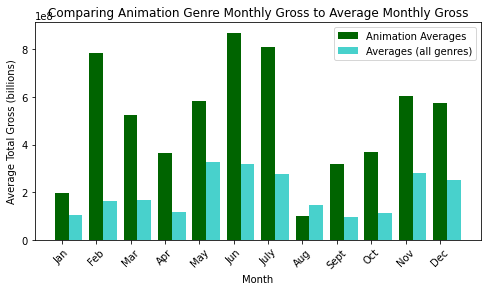

In [548]:
# ANIMATION and avg COMPARE
total_gross_avgs_animation = [genre_dict['Animation']['total_gross'][
    (genre_dict['Animation']['month_released']==i)&(genre_dict['Animation']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8,4))

plt.bar(bar1, total_gross_avgs_animation, width=w, color='darkgreen', label='Animation Averages', align='center')
plt.bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.title('Comparing Animation Genre Monthly Gross to Average Monthly Gross')
plt.legend()


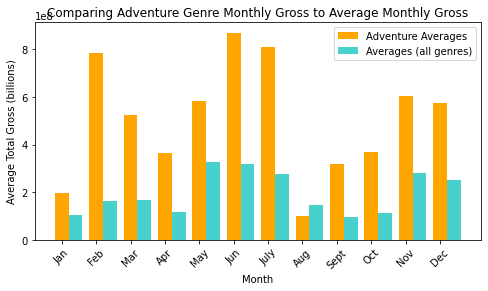

In [549]:
# Adventure and avg COMPARE

total_gross_avgs_adventure = [genre_dict['Adventure']['total_gross'][
    (genre_dict['Adventure']['month_released']==i)&(genre_dict['Adventure']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8,4))

plt.bar(bar1, total_gross_avgs_animation, width=w, color='orange', label='Adventure Averages', align='center')
plt.bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.title('Comparing Adventure Genre Monthly Gross to Average Monthly Gross')
plt.legend()

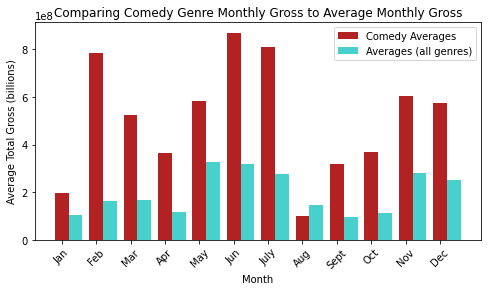

In [552]:
# Comedy and avg COMPARE

total_gross_avgs_adventure = [genre_dict['Comedy']['total_gross'][
    (genre_dict['Comedy']['month_released']==i)&(genre_dict['Comedy']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8,4))

plt.bar(bar1, total_gross_avgs_animation, width=w, color='firebrick', label='Comedy Averages', align='center')
plt.bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.title('Comparing Comedy Genre Monthly Gross to Average Monthly Gross')
plt.legend()

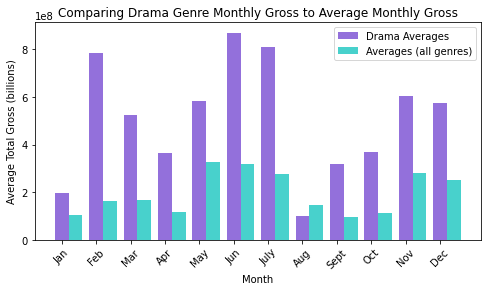

In [555]:
# Drama and avg COMPARE

total_gross_avgs_adventure = [genre_dict['Drama']['total_gross'][
    (genre_dict['Drama']['month_released']==i)&(genre_dict['Drama']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8,4))

plt.bar(bar1, total_gross_avgs_animation, width=w, color='mediumpurple', label='Drama Averages', align='center')
plt.bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.title('Comparing Drama Genre Monthly Gross to Average Monthly Gross')
plt.legend()

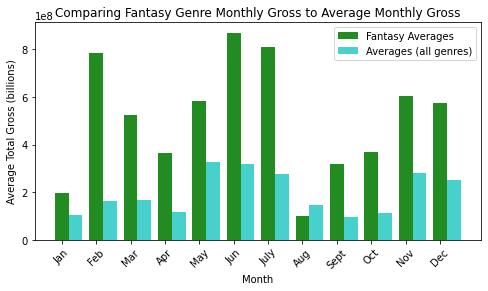

In [557]:
# Fantasy and avg COMPARE

total_gross_avgs_adventure = [genre_dict['Fantasy']['total_gross'][
    (genre_dict['Fantasy']['month_released']==i)&(genre_dict['Fantasy']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8,4))

plt.bar(bar1, total_gross_avgs_animation, width=w, color='forestgreen', label='Fantasy Averages', align='center')
plt.bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.title('Comparing Fantasy Genre Monthly Gross to Average Monthly Gross')
plt.legend()

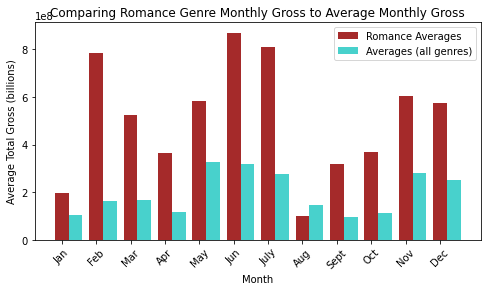

In [558]:
# Romance and avg COMPARE

total_gross_avgs_adventure = [genre_dict['Romance']['total_gross'][
    (genre_dict['Romance']['month_released']==i)&(genre_dict['Romance']['total_gross']!='Unknown')].mean() for i in months
    ]

w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8,4))

plt.bar(bar1, total_gross_avgs_animation, width=w, color='brown', label='Romance Averages', align='center')
plt.bar(bar2, mean_total_grosses, width=w, color='mediumturquoise', label='Averages (all genres)', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.title('Comparing Romance Genre Monthly Gross to Average Monthly Gross')
plt.legend()

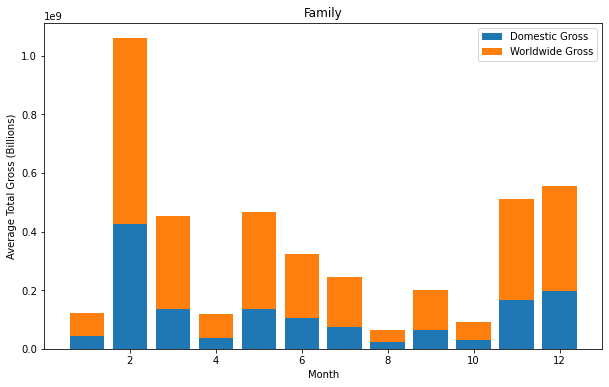

In [190]:
# FAMLEE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

months = [i for i in range(1,13)]

mean_dom_grosses = [genre_dict['Family'][genre_dict['Family']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Family'][genre_dict['Family']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Family')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))


fig.savefig('Family_movies.png')

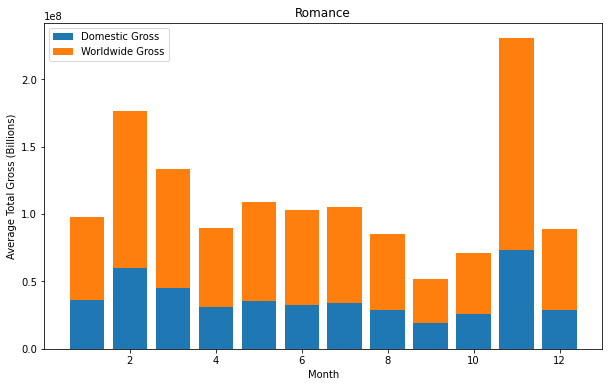

In [189]:
# ROMANTS
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

months = [i for i in range(1,13)]

mean_dom_grosses = [genre_dict['Romance'][genre_dict['Romance']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Romance'][genre_dict['Romance']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Romance')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))


fig.savefig('Romance_movies.png')

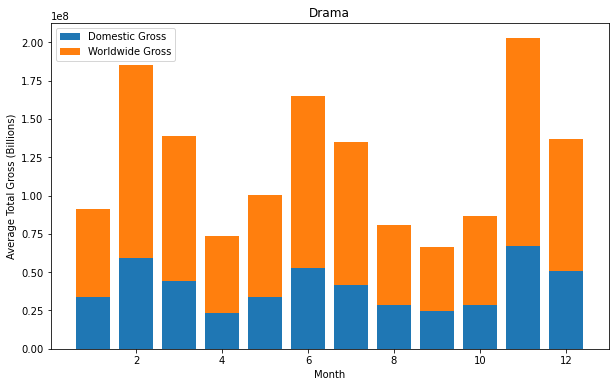

In [188]:
#DRAYMA
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

months = [i for i in range(1,13)]

mean_dom_grosses = [genre_dict['Drama'][genre_dict['Drama']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Drama'][genre_dict['Drama']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Drama')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))


fig.savefig('Drama_movies.png')

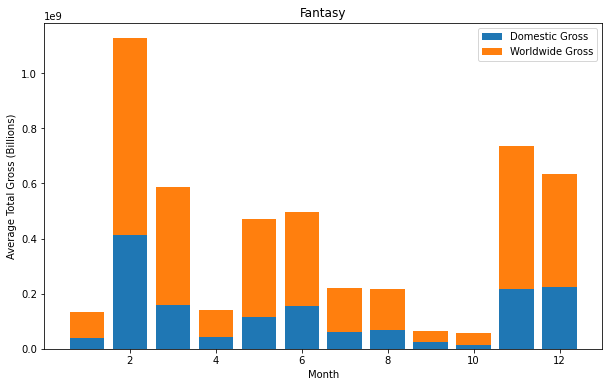

In [187]:
# FANTASY
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

months = [i for i in range(1,13)]

mean_dom_grosses = [genre_dict['Fantasy'][genre_dict['Fantasy']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Fantasy'][genre_dict['Fantasy']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Fantasy')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))


fig.savefig('Fantasy_movies.png')

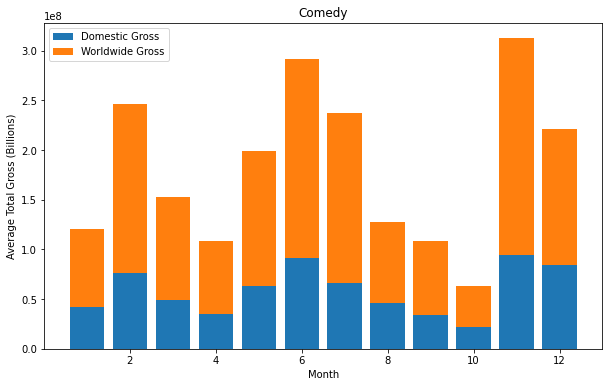

In [186]:
# COMEDY
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

months = [i for i in range(1,13)]

mean_dom_grosses = [genre_dict['Comedy'][genre_dict['Comedy']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Comedy'][genre_dict['Comedy']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Comedy')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))


fig.savefig('Comedy_movies.png')

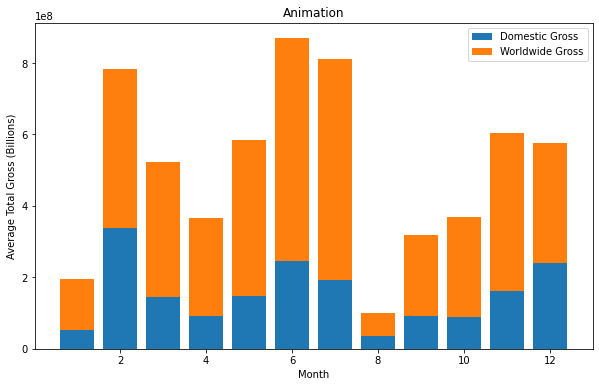

In [185]:
# ANIMATED MOVIES
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

months = [i for i in range(1,13)]

mean_dom_grosses = [genre_dict['Animation'][genre_dict['Animation']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Animation'][genre_dict['Animation']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Animation')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))


fig.savefig('Animated_movies.png')

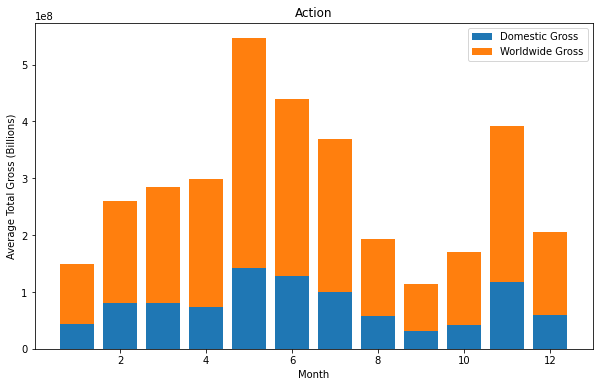

In [177]:
## ACTION MOVIES
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

mean_dom_grosses = [genre_dict['Action'][genre_dict['Action']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Action'][genre_dict['Action']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Action')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))

fig.savefig('Action_movies.png')

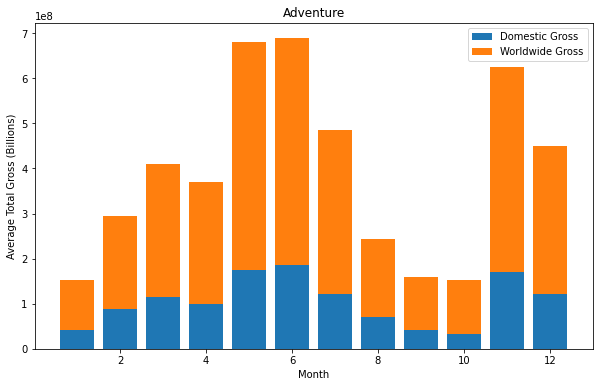

In [173]:
## ADVENTURE MOVIES
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

mean_dom_grosses = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax.bar(months, mean_dom_grosses)   
ad2 = ax.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax.set_title('Adventure')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')
ax.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))

fig.savefig('Adventure_movies.png')

Text(0, 0.5, 'Average Domestic Gross (Billions?)')

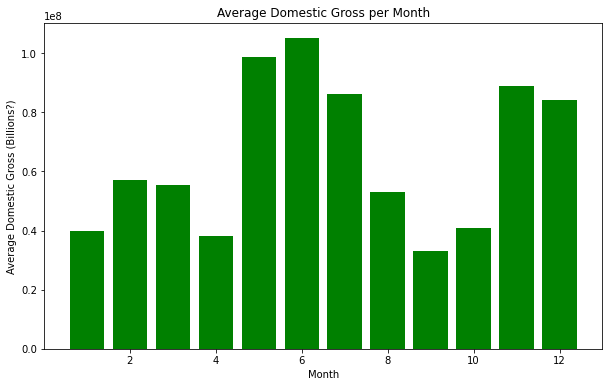

In [503]:
# comparing month released to mean DOMESTIC gross (using domestic_adj)
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_dom_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['domestic_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(months, mean_dom_grosses, color='green')   
ax.set_title('Average Domestic Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Billions?)')

In [88]:
# comparing mean gross without zeros
tnMovies_noz = tnMovieBudgets.replace(0, np.NaN)
tnMovies_noz

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month_released,year_released
0,1,2009-12-18,Avatar,425000000,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350.0,1.497624e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,NaN,NaN,12,2018
5778,79,1999-04-02,Following,6000,48482.0,2.404950e+05,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338.0,1.338000e+03,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,NaN,NaN,9,2015


In [205]:
# month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
#mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_adj'].mean(skipna=True) for i in range(1,13)]                                                                                               
#ax.bar(x, mean_dom_grosses1, color='indigo')   
#ax.set_title('Average Domestic Gross per Month, without outliers')
#ax.set_xlabel('Month')
#ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

# ***this graph of means have the same values as the other, but why?***

Text(0, 0.5, 'Average Worldwide Gross (Billions)')

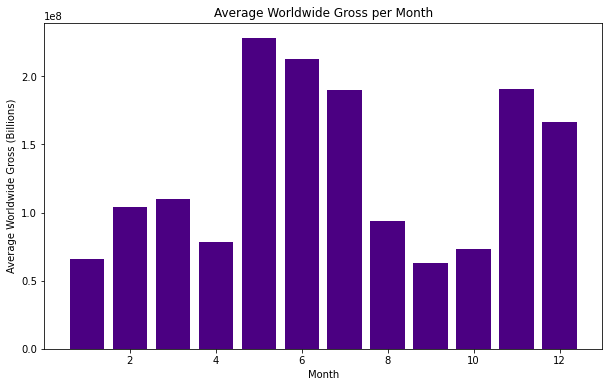

In [504]:
# comparing month released to mean WORLDWIDE gross
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_ww_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['worldwide_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(months, mean_ww_grosses, color='indigo')   
ax.set_title('Average Worldwide Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Worldwide Gross (Billions)')

# change y labels to be clearer

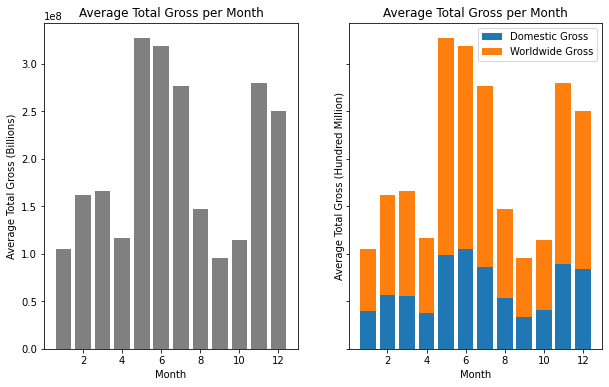

In [674]:
# comparing month released to mean WORLDWIDE + DOMESTIC, 2 plots


month_avg, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,6))

# x and y values
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_total_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['total_gross'].mean() for i in range(1,13)]

# setting up the graph 1
ax1.bar(months, mean_total_grosses, color='grey')   
ax1.set_title('Average Total Gross per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Gross (Billions)')

# setting up graph 2
p1 = ax2.bar(months, mean_dom_grosses)   
p2 = ax2.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax2.set_title('Average Total Gross per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Total Gross (Hundred Million)')

ax2.legend((p1[0], p2[0]), ('Domestic Gross', 'Worldwide Gross'))

plt.show()
popular_genres.savefig('avg_monthly_gross.png')

# may want to relabel xticks

In [93]:
# comparing budget and net gross


In [ ]:
# Measure the highest differences between worldwide and domestic gross (international appeal)

<ipython-input-603-d0e2542ec849>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_genre_ct_names, rotation = 45)
<ipython-input-603-d0e2542ec849>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(top_genre_ct_names, rotation = 45)


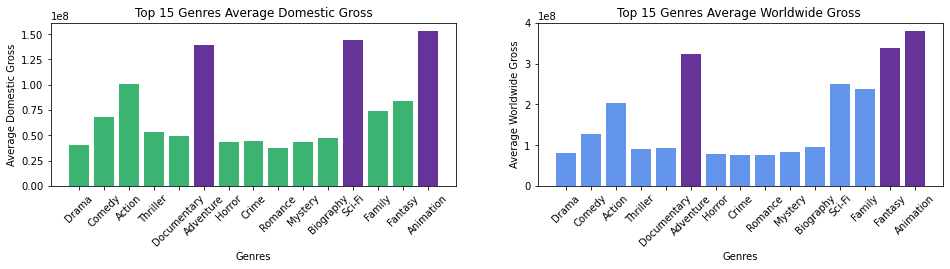

In [603]:
# top 15 genres average worldwide and domestic gross (2 charts)
popular_genres, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,3))
###############

domestic_avgs = [genre_dict_2[i]['domestic_adj_x'][genre_dict_2[i]['domestic_adj_x']!='Unknown'].mean() 
                 for i in top_genre_ct_names]
ww_avgs = [genre_dict_2[i]['worldwide_adj'].mean() for i in top_genre_ct_names]

# try a list comprehension for this (and if statement)
color_list = ["mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen",
              "rebeccapurple","mediumseagreen","mediumseagreen","mediumseagreen","mediumseagreen",
             "mediumseagreen", "rebeccapurple","mediumseagreen","mediumseagreen","rebeccapurple"]
color_list2 = ["cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue",
              "rebeccapurple","cornflowerblue","cornflowerblue","cornflowerblue","cornflowerblue",
             "cornflowerblue", "cornflowerblue","cornflowerblue","rebeccapurple","rebeccapurple"]

ax1.bar(top_genre_ct_names, domestic_avgs, color=color_list)
ax2.bar(top_genre_ct_names, ww_avgs, color=color_list2)
# x and y vals; use bottom parameter to make stacked
ax2.set_xlabel('Genres')
ax2.set_ylabel('Average Worldwide Gross')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Domestic Gross')

ax1.set_xticklabels(top_genre_ct_names, rotation = 45)
ax2.set_xticklabels(top_genre_ct_names, rotation = 45)

ax1.set_title('Top 15 Genres Average Domestic Gross')
ax2.set_title('Top 15 Genres Average Worldwide Gross ')

popular_genres.savefig('genre_avg_gross.png')
# notice that Western worldwide gross is less

### Average gross revenue for movie per genre

In [210]:
#removing Reality-TV from genre dict and genres list
genre_dict_2.pop('Reality-TV')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,foreign_gross,year_x,domestic_adj_x,foreign_adj,month_released,year_y,domestic_adj_y,worldwide_adj,budget_adj,total_BOM_gross
2292,tt7255884,Hush,Hush,2016,80,"[Documentary, Drama, Reality-TV]",True,1,Hush,ID,...,Unknown,Unknown,Unknown,Unknown,4,2016,0.0,0.0,1.078348e+06,NaN


In [669]:
genres.append('Western')
genres

KeyError: 'Reality-TV'

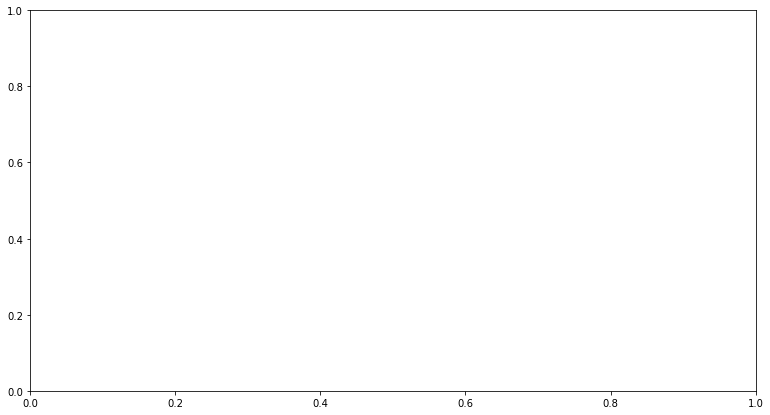

In [664]:
popular_genres, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
###############

total_gross_avgs = [genre_dict_2[i]['total_BOM_gross'][genre_dict_2[i]['total_BOM_gross']!='Unknown'].mean() 
                 for i in genres]
lc = [0,1,3,4,10]
color_list = ['palevioletred' if i in lc else 'skyblue' for i in range(0,len(genres))]

ax.bar(genres, total_gross_avgs, color=color_list)

# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Genres')
ax.set_ylabel('Average Total Gross')

ax.set_xticklabels(genres, rotation = 45)

ax.set_title('Average Total Gross per Genre')

popular_genres.savefig('avg_gross_per_genre.png')

In [248]:
# Calculate sum of top 3 in graph above vs sum of the other genres
oth = [i for i in range(0, len(genres))]

for index in lc:
    del oth[index]

       
total_gross_avg3 = sum(list(map(total_gross_avgs.__getitem__, lc)))
others_gross_avg = sum(list(map(total_gross_avgs.__getitem__,oth)))

print(total_gross_avg3 > others_gross_avg)# False

# Animation avg is __ more the avg of those under the top 3

animation_compare = total_gross_avgs[1] / (others_gross_avg / len(oth))
adventure_compare = total_gross_avgs[3] / (others_gross_avg / len(oth))
scifi_compare = total_gross_avgs[10] / (others_gross_avg / len(oth)) 
print(animation_compare, adventure_compare, scifi_compare)

False
3.02400509068617 2.7033637020543266 2.5647159050024415


In [ ]:
# Genre gross compared against average gross for a given month

### Which genres are the most common for each month

In [443]:
# first, let's append some usable "genre combos" to the genre dict 
def genre_contained_combos(df):
    combo_dict = {}
    
    combo_list = [("Romance","Comedy"), ("Animation","Comedy"), ("Adventure","Comedy"), 
                  ("Adventure","Drama"), ("Romance","Drama"), ("Animation", "Drama"), 
                 ("Family", "Comedy"), ("Family", "Drama")]
    
    for k in range(0, len(combo_list)):
        pair_name = combo_list[k][0] + '/' + combo_list[k][1]
        index_list = []
        ctr = 0
        rel_genres = ['Romance', 'Comedy', 'Animation', 'Drama', 'Adventure', 'Family']
        for row in df['genres']:
            if type(row) == list:
                row_pair_keepr = []
                for i in row:
                    #print(row)
                    if i in rel_genres:
                        row_pair_keepr.append(i)
                        if len(row_pair_keepr) == 2:
                            if (row_pair_keepr[0] in combo_list[k]) & (row_pair_keepr[1] in combo_list[k]):
                                index_list.append(ctr)                 
            ctr += 1
        combo_dict[pair_name] = imdb_BOM_tn.iloc[index_list]
        
    return combo_dict

In [444]:
genre_dict_3 = genre_contained_combos(imdb_BOM_tn)

In [445]:
genre_dict_3.update(genre_dict_2)
#imdb_BOM_tn[('Romance' in imdb_BOM_tn['genres']) & ('Comedy' in imdb_BOM_tn['genres'])],

In [446]:
genre_dict_3.keys()

dict_keys(['Romance/Comedy', 'Animation/Comedy', 'Adventure/Comedy', 'Adventure/Drama', 'Romance/Drama', 'Animation/Drama', 'Family/Comedy', 'Family/Drama', 'Action', 'Animation', 'Comedy', 'Adventure', 'Fantasy', 'Mystery', 'Drama', 'Romance', 'Documentary', 'Crime', 'Sci-Fi', 'Family', 'Thriller', 'Horror', 'Biography', 'History', 'News', 'War', 'Sport', 'Music', 'Musical', 'Western'])

In [416]:
len(genre_dict_3['Romance/Drama'])

167

MAKING GRAPH BELOW

Text(0.5, 1.0, 'Romance/Comedy vs Romance/Drama Average Total Gross per Month')

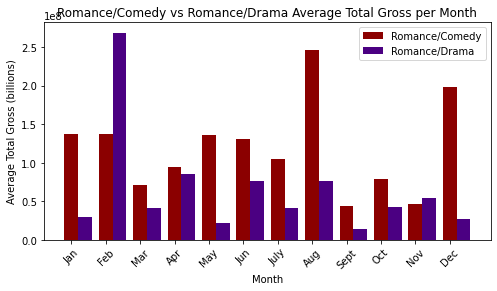

In [463]:
# Romance/Comedy vs Romance Drama TOTAL GROSS

###############

total_gross_avgs_comedy = [genre_dict_3['Romance/Comedy']['total_BOM_gross'][
    (genre_dict_3['Romance/Comedy']['month_released']==i)&(genre_dict_3['Romance/Comedy']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]

total_gross_avgs_drama = [genre_dict_3['Romance/Drama']['total_BOM_gross'][
    (genre_dict_3['Romance/Drama']['month_released']==i)&(genre_dict_3['Romance/Drama']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]
w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(8,4))

plt.bar(bar1, total_gross_avgs_comedy, width=w, color='darkred', label='Romance/Comedy', align='center')
plt.bar(bar2, total_gross_avgs_drama, width=w, color='indigo', label='Romance/Drama', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.legend()

plt.title('Romance/Comedy vs Romance/Drama Average Total Gross per Month')

In [453]:
# there are barely any movies that fit this criteria...
len(genre_dict_3['Animation/Drama'])

5

Text(0.5, 1.0, 'Animation/Comedy Total Gross per Month')

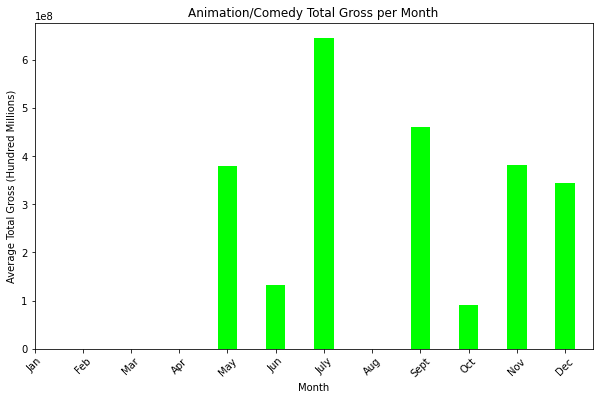

In [670]:
# Animation Comedy vs Animation Drama TOTAL GROSS


total_gross_avgs_comedy = [genre_dict_3['Animation/Comedy']['total_BOM_gross'][
    (genre_dict_3['Animation/Comedy']['month_released']==i)&(genre_dict_3['Animation/Comedy']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]

total_gross_avgs_drama = [genre_dict_3['Animation/Drama']['total_BOM_gross'][
    (genre_dict_3['Animation/Drama']['month_released']==i)&(genre_dict_3['Animation/Drama']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]


plt.figure(figsize=(10,6))

plt.bar(bar1, total_gross_avgs_comedy, width=w, color='lime', label='Animation/Comedy', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (Hundred Millions)')


plt.title('Animation/Comedy Total Gross per Month')


In [673]:
genre_dict_3['Animation/Comedy'][genre_dict_3['Animation/Comedy']['month_released']==7]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,foreign_gross,year_x,domestic_adj_x,foreign_adj,month_released,year_y,domestic_adj_y,worldwide_adj,budget_adj,total_BOM_gross
823,tt1323594,Despicable Me,Despicable Me,2010,95,"[Animation, Comedy, Family]",True,10,Ganuv Al Hayareach,IL,...,2.916e+08,2010,2.98506e+08,3.461e+08,7,2010,2.985223e+08,6.450389e+08,8.189621e+07,6.44623e+08


Text(0.5, 1.0, 'Adventure/Comedy vs Adventure/Drama Average Total Gross per Month')

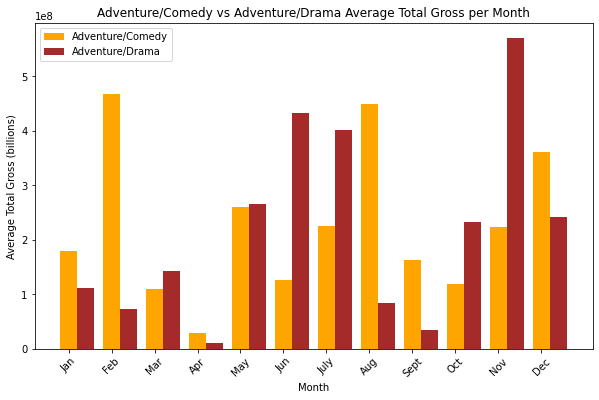

In [460]:
# Adventure Comedy vs Adventure Drama TOTAL GROSS

total_gross_avgs_comedy = [genre_dict_3['Adventure/Comedy']['total_BOM_gross'][
    (genre_dict_3['Adventure/Comedy']['month_released']==i)&(genre_dict_3['Adventure/Comedy']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]

total_gross_avgs_drama = [genre_dict_3['Adventure/Drama']['total_BOM_gross'][
    (genre_dict_3['Adventure/Drama']['month_released']==i)&(genre_dict_3['Adventure/Drama']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]
w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(10,6))

plt.bar(bar1, total_gross_avgs_comedy, width=w, color='orange', label='Adventure/Comedy', align='center')
plt.bar(bar2, total_gross_avgs_drama, width=w, color='brown', label='Adventure/Drama', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.legend()

plt.title('Adventure/Comedy vs Adventure/Drama Average Total Gross per Month')

In [ ]:
# Adventure Comedy vs Adventure Drama MOVIE COUNT

Text(0.5, 1.0, 'Family/Comedy vs Family/Drama Average Total Gross per Month')

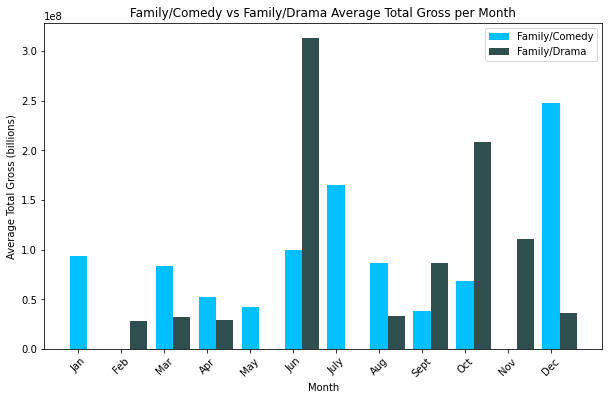

In [459]:
# Family Comedy vs Family Drama TOTAL GROSS

total_gross_avgs_comedy = [genre_dict_3['Family/Comedy']['total_BOM_gross'][
    (genre_dict_3['Family/Comedy']['month_released']==i)&(genre_dict_3['Family/Comedy']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]

total_gross_avgs_drama = [genre_dict_3['Family/Drama']['total_BOM_gross'][
    (genre_dict_3['Family/Drama']['month_released']==i)&(genre_dict_3['Family/Drama']['total_BOM_gross']!='Unknown')].mean() for i in months
    ]
w = 0.4
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]

plt.figure(figsize=(10,6))

plt.bar(bar1, total_gross_avgs_comedy, width=w, color='deepskyblue', label='Family/Comedy', align='center')
plt.bar(bar2, total_gross_avgs_drama, width=w, color='darkslategrey', label='Family/Drama', align='center')

month_tix = [i for i in range(0,12)]
plt.xticks(month_tix, month_names, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Month')
plt.ylabel('Average Total Gross (billions)')
plt.legend()

plt.title('Family/Comedy vs Family/Drama Average Total Gross per Month')

Here is the source for the double bar graph code : https://www.youtube.com/watch?v=ZjQCPMO7LBE

### Genre gross profit per year 2010-now

In [458]:
imdb_BOM_tn['year_y'].value_counts().sum() - imdb_BOM_tn['year_y'][imdb_BOM_tn['year_y']>1999].value_counts().sum()



487

In [486]:
year_list = sorted(list(imdb_BOM_tn['year_y'][(imdb_BOM_tn['year_y']>2009) & (imdb_BOM_tn['year_y']<2019)].value_counts().index))

year_list

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

For line chart, used this as a guide: https://python-graph-gallery.com/122-multiple-lines-chart/

Text(0.5, 1.0, 'Average Total Gross for the TOP 5 Genres between 2010-2018')

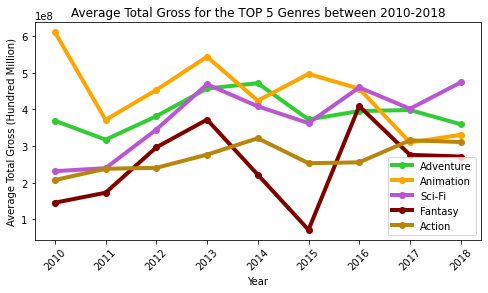

In [661]:
# LINE GRAPH for TOP 5 Genres Avg Total Gross 1999-now

adventure = [genre_dict_3['Adventure'][(genre_dict_3['Adventure']['year_y']==i)&(genre_dict_3['Adventure']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_list]
animation = [genre_dict_3['Animation'][(genre_dict_3['Animation']['year_y']==i)&(genre_dict_3['Animation']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_list]
scifi = [genre_dict_3['Sci-Fi'][(genre_dict_3['Sci-Fi']['year_y']==i)&(genre_dict_3['Sci-Fi']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_list]
fantasy = [genre_dict_3['Fantasy'][(genre_dict_3['Fantasy']['year_y']==i)&(genre_dict_3['Fantasy']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_list]
action = [genre_dict_3['Action'][(genre_dict_3['Action']['year_y']==i)&(genre_dict_3['Action']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_list]

plt.figure(figsize=(8,4))

plt.plot( year_list, adventure, marker='o', markerfacecolor='limegreen', markersize=6, color='limegreen', label='Adventure', linewidth=4)
plt.plot( year_list, animation, marker='o', markerfacecolor='orange', markersize=6, color='orange', label='Animation', linewidth=4)
plt.plot( year_list, scifi, marker='o', markerfacecolor='mediumorchid', markersize=6, color='mediumorchid', label='Sci-Fi', linewidth=4)
plt.plot( year_list, fantasy, marker='o', markerfacecolor='maroon', markersize=6, color='maroon', label='Fantasy', linewidth=4)
plt.plot( year_list, action, marker='o', markerfacecolor='darkgoldenrod', markersize=6, color='darkgoldenrod', label='Action', linewidth=4)

year_tix = year_list
plt.xticks(year_list, year_list, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Year')
plt.ylabel('Average Total Gross (Hundred Million)')
plt.legend()

plt.title('Average Total Gross for the TOP 5 Genres between 2010-2018')

# These numbers are adjusted for inflation, so positive trends are not affected

Text(0.5, 1.0, 'Average Total Gross for Sci-Fi Movies (each year between 2010-2018)')

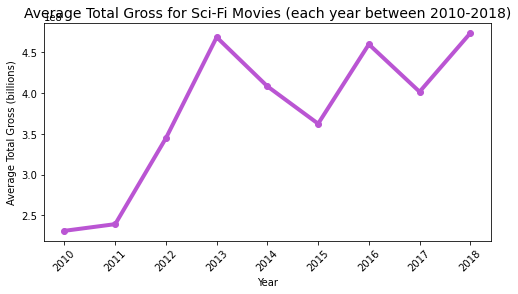

In [600]:
# Now that we see that Sci Fi is the only discernable trend, let's just graph Sci-Fi

scifi = [genre_dict_3['Sci-Fi'][(genre_dict_3['Sci-Fi']['year_y']==i)&(genre_dict_3['Sci-Fi']['total_BOM_gross']!='Unknown')]['total_BOM_gross'].mean() for i in year_list]

plt.figure(figsize=(8,4))

plt.plot( year_list, scifi, marker='o', markerfacecolor='mediumorchid', markersize=6, color='mediumorchid', label='Sci-Fi', linewidth=4)

year_tix = year_list
plt.xticks(year_list, year_list, rotation=45)

# x and y vals; use bottom parameter to make stacked
plt.xlabel('Year')
plt.ylabel('Average Total Gross (billions)')

plt.title("Average Total Gross for Sci-Fi Movies (each year between 2010-2018)", size=14)


### Analyzing Data per STUDIO

In [114]:
# List of studios
studio_list = []
for studio in imdb_BOM_tn['studio'][imdb_BOM_tn['studio']!='Unknown']:
    if studio not in studio_list:
        studio_list.append(studio)
                
studio_list


['IFC',
 'Fox',
 'Uni.',
 'FD',
 'BV',
 'P/DW',
 'LGF',
 'Wein.',
 'RTWC',
 'WB',
 'Over.',
 'Sony',
 'Par.',
 'W/Dim.',
 'FoxS',
 'A24',
 'CBS',
 'Rela.',
 'WB (NL)',
 'Sum.',
 'Osci.',
 'Focus',
 'SGem',
 'EOne',
 'SMod',
 'SPC',
 'LG/S',
 'Mira.',
 'RAtt.',
 'ORF',
 'OMNI/FSR',
 'App.',
 'Magn.',
 'Amazon',
 'FCW',
 'DR',
 'Free',
 'BG',
 'STX',
 'Gold.',
 'ATO',
 'Relbig.',
 'BST',
 'Anch.',
 'MGM',
 'TriS',
 'UTV',
 'Drft.',
 'MNE',
 'WHE',
 'KE',
 'Viv.',
 'Jan.',
 '3D',
 'MBox',
 'Eros',
 'ParV',
 'ALP',
 'VE',
 'P4',
 'LD',
 'Yash',
 'BH Tilt',
 'IM',
 'Studio 8',
 'PH',
 'TFA',
 'ENTMP',
 'Alc',
 'Strand',
 'Saban',
 'CE',
 'Trib.',
 'EC',
 'BSC',
 'Cohen',
 'ELS',
 'PNT',
 'Annapurna',
 'LGP',
 'Cleopatra',
 'PFR',
 'BBC',
 'Affirm',
 'Orch.',
 'GrtIndia',
 'RLJ',
 'Neon',
 'Global Road',
 'NM',
 'IW',
 'Scre.',
 'Kino',
 'First',
 'GK',
 'NFC',
 'Mont.',
 'IVP',
 'CJ']

In [ ]:
# Differences in STUDIO mean gross per year
###############

years = [genre_dict_2[i]['domestic_adj_y'].mean() for i in top_genre_ct_names]
avg_gross = [genre_dict_2[i]['worldwide_adj'].mean() for i in top_genre_ct_names]

plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Year')
ax.set_ylabel('Average Total Gross')

ax.set_xticklabels(years, rotation = 45)

ax.set_title('Top 15 Genres Average Domestic Gross')

In [132]:
studios_dict = {studio_list[i]:imdb_BOM_tn['total_BOM_gross'][imdb_BOM_tn['studio']==studio_list[i]].mean() for i in range(0, len(studio_list))}
sorted_top_15_genres = sorted(studios_dict.items(), key=lambda kv: kv[1], reverse=True)[:15]

top_15_studio_names = [sorted_top_15_genres[i][0] for i in range(0, len(sorted_top_15_genres))]
top_15_studio_avgs = [sorted_top_15_genres[i][1] for i in range(0, len(sorted_top_15_genres))]


<ipython-input-137-8cc3e5746fe9>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_15_studio_names, rotation = 45)


Text(0.5, 1.0, 'Top 15 Studios by Avg Total Gross')

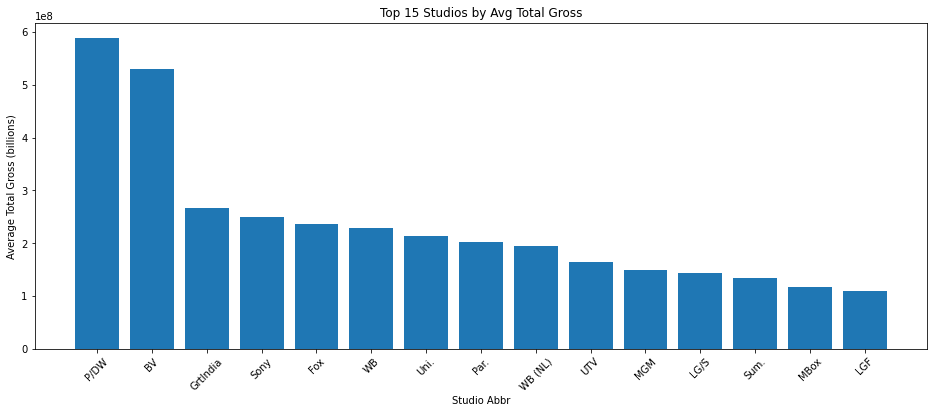

In [137]:
# Studio average total Gross

studio_grosses, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
###############

top_studios = top_15_studio_names
studio_avgs = top_15_studio_avgs

ax.bar(top_studios, studio_avgs)

# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Studio Abbr')
ax.set_ylabel('Average Total Gross (billions)')

ax.set_xticklabels(top_15_studio_names, rotation = 45)

ax.set_title('Top 15 Studios by Avg Total Gross')

# P/DW == Pixar and Dreamworks
# BV == ???

In [561]:
imdb_BOM_tn[imdb_BOM_tn['studio']=='BV'].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,foreign_gross,year_x,domestic_adj_x,foreign_adj,month_released,year_y,domestic_adj_y,worldwide_adj,budget_adj,total_BOM_gross
17,tt0398286,Tangled,Tangled,2010,100,"[Adventure, Animation, Comedy]",True,10,Raiponce,FR,...,3.91e+08,2010,2.3833e+08,4.64078e+08,11,2010,2.383559e+08,6.960907e+08,3.085944e+08,7.02434e+08
18,tt0401729,John Carter,John Carter,2012,132,"[Action, Adventure, Sci-Fi]",True,10,Джон Картер: Мiж двох свiтiв,UA,...,2.111e+08,2012,8.24023e+07,2.37964e+08,3,2012,8.235577e+07,3.187630e+08,3.099951e+08,3.20319e+08
23,tt0433035,Real Steel,Real Steel,2011,127,"[Action, Drama, Family]",True,10,Čelična borba,RS,...,2.138e+08,2011,9.83749e+07,2.45995e+08,10,2011,9.833263e+07,3.036162e+08,1.265641e+08,3.44327e+08
25,tt0435761,Toy Story 3,Toy Story 3,2010,103,"[Adventure, Animation, Comedy]",True,10,Η ιστορία των παιχνιδιών 3,GR,...,6.52e+08,2010,4.92564e+08,7.7386e+08,6,2010,4.925699e+08,1.268655e+09,2.373803e+08,1.26643e+09
27,tt0443272,Lincoln,Lincoln,2012,150,"[Biography, Drama, History]",True,10,Lincoln,HR,...,9.31e+07,2012,2.05386e+08,1.04947e+08,11,2012,2.053949e+08,3.081310e+08,7.327158e+07,3.10342e+08


### Comparing BUDGET vs TOTAL GROSS (using tnMovieBudget data)

In [568]:
len(imdb_master_money['budget_adj'])

3816

In [569]:
len(imdb_master_money['total_gross'])

3816

In [567]:
imdb_master_money[['budget_adj', 'total_gross']]

,budget_adj,total_gross
0,5.072648e+07,8.308546e+04
1,3.396470e+07,3.270231e+08
2,2.183902e+05,2.485067e+06
3,2.183902e+05,2.485067e+06
4,2.777455e+07,1.114774e+07
...,...,...
3811,1.340990e+07,6.754783e+07
3812,2.644572e+07,6.180250e+07
3813,5.480381e+07,2.741959e+08
3814,2.246818e+06,0.000000e+00


source code for obtaining regression slope : https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation

0.7131341432169219


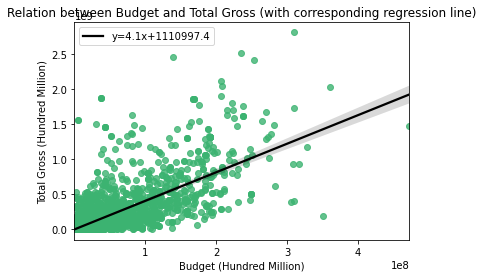

In [660]:
import seaborn as sns
from scipy import stats

budget_nums = list(imdb_master_money[imdb_master_money['total_gross']<3000000000]['budget_adj'].values)
total_gross_nums = list(imdb_master_money[imdb_master_money['total_gross']<3000000000]['total_gross'].values)
#total_gross_nums = [imdb_master_money[imdb_master_money['total_gross']<3000000000]['total_gross'][i] for i in range(0, len(imdb_master_money[imdb_master_money['total_gross']<3000000000]))]

slope, intercept, r_value, p_value, std_err = stats.linregress(budget_nums, total_gross_nums)

ax = sns.regplot(x=budget_nums, y=total_gross_nums, scatter_kws={"color": "mediumseagreen"}, line_kws={"color": "black", "label":"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel="Budget (Hundred Million)", ylabel = "Total Gross (Hundred Million)")
ax.set_title('Relation between Budget and Total Gross (with corresponding regression line)', size=12)

ax.legend()

# for PPT, point out strong correlation
print(r_value)



In [630]:
titles = ['Beauty and the Beast', 'Rocky', 'Minions']

imdb_master_money[imdb_master_money['primary_title']==titles[0]]


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
2618,tt2316801,Beauty and the Beast,La belle et la bête,2014,112,"[Drama, Fantasy, Romance]",False,10,La bella y la bestia,MX,...,26.701,2012-01-13,7.7,5730,3,2017,5.321655e+08,1.329531e+09,1.689367e+08,1.861697e+09
2619,tt2316801,Beauty and the Beast,La belle et la bête,2014,112,"[Drama, Fantasy, Romance]",False,10,La bella y la bestia,MX,...,26.701,2012-01-13,7.7,5730,11,1991,7.145944e+08,1.156158e+09,3.800455e+07,1.870752e+09
2620,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129,"[Family, Fantasy, Musical]",True,10,Красавица и чудовище,RU,...,26.701,2012-01-13,7.7,5730,3,2017,5.321655e+08,1.329531e+09,1.689367e+08,1.861697e+09
2621,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129,"[Family, Fantasy, Musical]",True,10,Красавица и чудовище,RU,...,26.701,2012-01-13,7.7,5730,11,1991,7.145944e+08,1.156158e+09,3.800455e+07,1.870752e+09
2622,tt9173998,Beauty and the Beast,Beauty and the Beast,2018,60,"[Family, Fantasy, Musical]",True,Unknown,Unknown,Unknown,...,26.701,2012-01-13,7.7,5730,3,2017,5.321655e+08,1.329531e+09,1.689367e+08,1.861697e+09
2623,tt9173998,Beauty and the Beast,Beauty and the Beast,2018,60,"[Family, Fantasy, Musical]",True,Unknown,Unknown,Unknown,...,26.701,2012-01-13,7.7,5730,11,1991,7.145944e+08,1.156158e+09,3.800455e+07,1.870752e+09


In [631]:
imdb_master_money[imdb_master_money['primary_title']==titles[1]]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
3018,tt3080284,Rocky,Rocky,2013,136,"[Action, Comedy, Drama]",True,1,Rocky,IN,...,Unknown,Unknown,Unknown,Unknown,11,1976,5.332468e+08,1.023418e+09,4.548524e+06,1.556665e+09
3019,tt9430578,Rocky,Rocky,2019,Unknown,"[Action, Drama, Romance]",True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,11,1976,5.332468e+08,1.023418e+09,4.548524e+06,1.556665e+09


In [632]:
imdb_master_money[imdb_master_money['primary_title']==titles[2]]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
2587,tt2293640,Minions,Minions,2015,91,"[Adventure, Animation, Comedy]",True,10,Suoiuiw,IT,...,9.338,2015-07-10,6.4,7343,7,2015,3.669456e+08,1.267030e+09,8.080439e+07,1.633976e+09


In [658]:
imdb_master_money.loc[1049]                              

tconst                                   tt1454468
primary_title                              Gravity
original_title                             Gravity
start_year                                    2013
runtime_minutes                                 91
genres                   [Drama, Sci-Fi, Thriller]
title_equal                                   True
ordering_akas                                   10
title                                      Gravité
region                                          CA
language                                        fr
types                                  imdbDisplay
attributes                                 Unknown
is_original_title                                0
directors                                nm0190859
writers              nm0190859,nm0190861,nm0000123
ordering_princ                                  10
nconst                                   nm0002747
category                                    editor
job                            

In [652]:
df_animation = genre_dict['Animation'][(genre_dict['Animation']['year']==2010)&(genre_dict['Animation']['total_gross']>600000000)]
df_animation

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
17,tt0398286,Tangled,Tangled,2010,100,"[Adventure, Animation, Comedy]",True,10,Raiponce,FR,...,21.511,2010-11-24,7.5,6407,11,2010,2.383559e+08,6.960907e+08,3.085944e+08,9.344466e+08
25,tt0435761,Toy Story 3,Toy Story 3,2010,103,"[Adventure, Animation, Comedy]",True,10,Η ιστορία των παιχνιδιών 3,GR,...,24.445,2010-06-17,7.7,8340,6,2010,4.925699e+08,1.268655e+09,2.373803e+08,1.761225e+09
158,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98,"[Action, Adventure, Animation]",True,10,Como Treinar o Seu Dragão,BR,...,28.734,2010-03-26,7.7,7610,3,2010,2.582475e+08,5.873631e+08,1.958388e+08,8.456106e+08
159,tt0892791,Shrek Forever After,Shrek Forever After,2010,93,"[Adventure, Animation, Comedy]",True,10,Shrek nüüd ja igavesti,EE,...,15.041,2010-05-16,6.1,3843,5,2010,2.833571e+08,8.975880e+08,1.958388e+08,1.180945e+09
823,tt1323594,Despicable Me,Despicable Me,2010,95,"[Animation, Comedy, Family]",True,10,Ganuv Al Hayareach,IL,...,23.673,2010-07-09,7.2,10057,7,2010,2.985223e+08,6.450389e+08,8.189621e+07,9.435613e+08


In [653]:
imdb_master_money.loc[17]['total_gross'] / imdb_master_money.loc[17]['budget_adj']




3.028073753846154

In [653]:
imdb_master_money.loc[25]['total_gross'] / imdb_master_money.loc[25]['budget_adj']




3.028073753846154

In [653]:
imdb_master_money.loc[158]['total_gross'] / imdb_master_money.loc[158]['budget_adj']




3.028073753846154

In [659]:
imdb_master_money.loc[823]['total_gross'] / imdb_master_money.loc[823]['budget_adj']




11.521428376811594

In [647]:
imdb_master_money.loc[86]['total_gross'] / imdb_master_money.loc[86]['budget_adj']
                                                                     
                                                                     
                                                                     

4.262422382222223

In [654]:
imdb_master_money.loc[2067]['total_gross'] / imdb_master_money.loc[2067]['budget_adj']

9.919508415384616

In [649]:
imdb_master_money.loc[787]['total_gross'] / imdb_master_money.loc[787]['budget_adj']

8.12192272

In [650]:
imdb_master_money.loc[1049]['total_gross'] / imdb_master_money.loc[1049]['budget_adj']

8.798103436363636

In [110]:
imdb_BOM_tn['studio'][imdb_BOM_tn['studio']!='Unknown'].value_counts().sum()

1681

In [582]:
imdb_master_money[imdb_master_money['total_gross']>5000000000]

# since these movies were made before the year 2000, we are going to remove them from the scatter plot

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj,total_gross
2877,tt2668120,Bambi,Bambi,2013,58,"[Biography, Documentary]",True,1,Bambi,FR,...,Unknown,Unknown,Unknown,Unknown,8,1942,1.632208e+09,4.255297e+09,1.362330e+07,5.887506e+09
3754,tt7821084,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,2017,49,"[Animation, Family]",True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,12,1937,3.323663e+09,3.323663e+09,2.674380e+07,6.647326e+09
3755,tt9691476,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,2016,Unknown,"[Comedy, Drama, Fantasy]",True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,12,1937,3.323663e+09,3.323663e+09,2.674380e+07,6.647326e+09


In [ ]:
# percent of subscribers that watch new content provided by a streaming service

In [ ]:
# comparing streaming services with multiple figs

Speaker notes

Intro

Overview 
- we are going to go over three aspects of our insights, (read)
- we are analyzing these aspects in relation to Total Gross - Total Gross is measured by domestic gross and worldwide gross